# Description of the project

F9 is a Russian airline operating domestic passenger flights. It is important to understand the preferences of users who buy tickets to certain destinations.

## General information

In [1]:
# Import packages
import pandas as pd
import plotly.express as px
import matplotlib as plt

In [2]:
# Read files
flights = pd.read_csv('flights.csv', sep=',', index_col=0)
city = pd.read_csv('city.csv', sep=',', index_col=0)

In [3]:
flights

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
# Info
flights.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


In [5]:
# First 5 rows 
city.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [6]:
# Info
city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [7]:
# Describe file
city.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


In [8]:
# Describe file
flights.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


In [9]:
# Checking the number of duplicates
city.duplicated().sum()

0

The flights table has two columns with 8 values in them. There are no missing values or duplicates. The city table also has two columns with 101 values. There are also no duplicates or omissions among them.

## Проверить типы данных на корректность

In [10]:
# Change type
city['average_flights'] = pd.to_numeric(city['average_flights'], downcast='float')

In [11]:
# Info
city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float32
dtypes: float32(1), object(1)
memory usage: 2.0+ KB


I changed the data type to float32, as this will allow us to reduce the amount of memory used.

In [12]:
# Top-10 cities by amount of flights
city.sort_values(by='average_flights', ascending=False).head(10)

,city,average_flights
43,Москва,129.774200
70,Санкт-Петербург,31.161291
54,Новосибирск,17.322580
33,Красноярск,11.580646
20,Екатеринбург,11.322580
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612904
84,Ульяновск,9.580646


Bryansk unexpectedly turned out to be among the cities in the top 10 in terms of the number of flights, since it is not a million-strong city, it does not have large agglomerations around, as well as large industrial or agricultural enterprises.

## Построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов

<AxesSubplot:title={'center':'The average number of flights per day in the 10 largest cities in August'}, xlabel='city'>

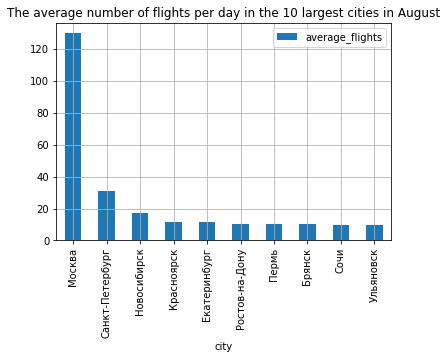

In [13]:
# Amount of flights by cities
city.sort_values(by='average_flights', ascending=False).head(10).plot(x='city', y='average_flights', grid=True, kind='bar', title='The average number of flights per day in the 10 largest cities in August')

Moscow stands out sharply, as it is the capital and largest city of Russia. There were an average of 120 flights in August. The cities of Novosibirsk, Krasnoyarsk, Yekaterinburg, Rostov-on-Don, Sochi, Ulyanovsk, Perm, Bryansk had an average of 10 to 17 flights per day in August.

<AxesSubplot:title={'center':'The average number of flights per day for each aircraft model'}, xlabel='model'>

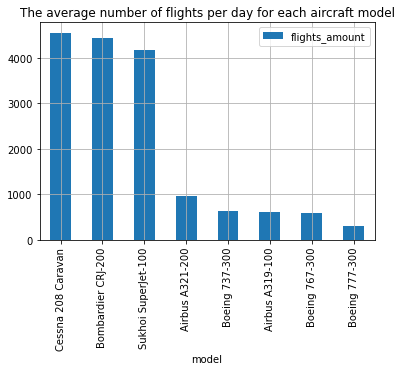

In [14]:
# Flight amount by model
flights.sort_values(by='flights_amount', ascending=False).plot(x='model', y='flights_amount', grid=True, kind='bar', title='The average number of flights per day for each aircraft model')

Most often in August, people traveled on aircraft models: Sukhoi SuperJet-100, Cessna 208 Caravan, Bombardier CRJ-200. These aircraft are short-haul, designed to fly up to 3,000 km. Accordingly, they are intended within Russia for flights between nearby regions. Also, these planes are not designed for a large volume of passengers (the largest of them is designed for 100 people). According to Wikipedia, such aircraft are most often used for charter and passenger transportation. Unlike the rest of the aircraft on the list, these aircraft are much smaller in size and range.

In [15]:
# Analysis by cities outside the top 10
other_city = city.query('average_flights < 9.58')

In [16]:
# Analysis by cities outside the top 10
other_city_sort = other_city.sort_values(by='average_flights', ascending=False)
fig = px.bar(other_city_sort,
            y='city',
            x='average_flights',
            title='Cities outside the top 10 in terms of incoming traffic',
            text='average_flights',
            orientation='h',
            height = 1000,
            labels={'average_flights' : 'Average number of arrivals per day', 'city' : 'Город'})

fig.show()

Surgut and Khanty-Mansiysk are the leaders among the non-top 10 cities in terms of incoming traffic. It is worth noting that among the leading cities not from the top 10, the largest cities of Siberia are mainly located. This can be explained by the fact that Russia's largest industrial enterprises are located in Siberia. Among the cities with the lowest flights per day, several cities stand out (Ust-Kut, Grozny, Bratsk, Yaroslavl and others).
In general, the small number of flights in cities can be explained by the fact that major transport hubs are located in Moscow, St. Petersburg, Samara, Kaliningrad, Rostov-on-Don, Nizhny Novgorod, Yekaterinburg, Novosibirsk and Vladivostok. The remaining flights are distributed according to the residual principle.

## Summary

As part of the work with databases, we concluded that the hypothesis about the connection between music festivals and the demand for air tickets cannot be verified, since the sample turned out to be small. As part of the work with the tables, we received unexpected conclusions about the 10 largest cities in terms of the number of flights in August 2018. The small town of Bryansk appeared there. It is also worth noting that Sovetsky is among the largest cities in 11th place. It is also worth highlighting that the flights were mainly carried out on 3 types of aircraft (Sukhoi SuperJet-100, Cessna 208 Caravan, Bombardier CRJ-200), more than 4,000 flights on each of them.